In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
covid=pd.read_csv('covid_19_india_itv')

In [3]:
covid.isnull().sum()    # no null values

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [4]:
covid.info()     #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
covid['Date']=pd.to_datetime(covid['Date'],format='%Y-%m-%d')   # date str to datetime obj

In [7]:
covid['Year']=covid['Date'].dt.year
covid['Month']=covid['Date'].dt.month
covid['Day']=covid['Date'].dt.day

In [6]:
covid.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)
# dropped unwanted data

In [8]:
covid.replace('Bihar****','Bihar',inplace=True)
covid.replace('Dadra and Nagar Haveli and Daman and Diu','Dadra and Nagar Haveli',inplace=True)
covid.replace('Telangana','Telengana',inplace=True)

In [9]:
covid

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,Day
0,1,2020-01-30,Kerala,0,0,1,2020,1,30
1,2,2020-01-31,Kerala,0,0,1,2020,1,31
2,3,2020-02-01,Kerala,0,0,2,2020,2,1
3,4,2020-02-02,Kerala,0,0,3,2020,2,2
4,5,2020-02-03,Kerala,0,0,3,2020,2,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,Telengana,613124,3703,628282,2021,7,7
16846,16847,2021-07-07,Tripura,63964,701,68612,2021,7,7
16847,16848,2021-07-07,Uttarakhand,332006,7338,340882,2021,7,7
16848,16849,2021-07-07,Uttar Pradesh,1682130,22656,1706818,2021,7,7


In [50]:
df_covid=covid.groupby('State/UnionTerritory')[['Confirmed','Deaths','Cured']].sum()

In [94]:
df_covid.index              #adding all indexs into new states coloumnstates

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Cases being reassigned to states', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'],
      dtype='object', name='State/UnionTerritory')

In [54]:
df_covid['States']=['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Cases being reassigned to states', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telengana', 'Tripura', 'Unassigned', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal']

In [55]:
df_covid['Mortalility_rate']=df_covid['Deaths']/(df_covid['Confirmed']*100)

In [68]:
x=df_covid['States']
y=df_covid['Confirmed']
z=df_covid['Deaths']
c=df_covid['Cured']
d=df_covid['Mortalility_rate']

variables

In [77]:
cov=covid.groupby('State/UnionTerritory').Confirmed.sum()
df_case=pd.DataFrame(cov).sort_values(by='Confirmed',ascending=False)

In [81]:
dea=covid.groupby('State/UnionTerritory').Deaths.sum()
df_dea=pd.DataFrame(dea).sort_values(by='Deaths',ascending=False)

In [82]:
cur=covid.groupby('State/UnionTerritory').Cured.sum()
df_cur=pd.DataFrame(cur).sort_values(by='Cured',ascending=False)

In [90]:
sum_year=covid.groupby("Year")[["Confirmed","Cured","Deaths"]].sum()

In [92]:
sum_mon=covid.groupby("Month")[["Confirmed","Cured","Deaths"]].sum()

In [181]:
maha_data=(df_covid.iloc[22])
c_maha=pd.DataFrame(maha_data)
mh_c=c_maha.drop(['States','Mortalility_rate'])

In [182]:
del_data=(df_covid.iloc[10])
c_del=pd.DataFrame(del_data)
dl_c=c_del.drop(['States','Mortalility_rate'])

## Insights

States with most cases

In [96]:
df_case.head(10)          

,Confirmed
State/UnionTerritory,
Maharashtra,908892470
Karnataka,387597335
Kerala,344319045
Tamil Nadu,342829697
Andhra Pradesh,324146783
Uttar Pradesh,252843682
Delhi,236972842
West Bengal,209822848
Rajasthan,128998101


States with most deaths

In [83]:
df_dea.head(10)

,Deaths
State/UnionTerritory,
Maharashtra,19314532
Karnataka,4819018
Tamil Nadu,4731627
Delhi,4066907
Uttar Pradesh,3347656
West Bengal,3214840
Andhra Pradesh,2475816
Punjab,2216735
Gujarat,1866811


States with most recoverd cases

In [84]:
df_cur.head(10)

,Cured
State/UnionTerritory,
Maharashtra,813788907
Karnataka,345648926
Tamil Nadu,317067499
Kerala,311127643
Andhra Pradesh,303427899
Uttar Pradesh,232529439
Delhi,224062704
West Bengal,195296839
Odisha,117984789


In [85]:
df_case.sum()

Confirmed    4353478074
dtype: int64

In [86]:
df_dea.sum()

Deaths    58726000
dtype: int64

In [87]:
df_cur.sum()

Cured    3977194136
dtype: int64

In [91]:
sum_year

,Confirmed,Cured,Deaths
Year,,,
2020,1074022781,941314195,17022508
2021,3279455293,3035879941,41703492


In [121]:
sum_mon

,Confirmed,Cured,Deaths
Month,,,
1,326469749,315332019,4709167
2,305631889,297133802,4359434
3,356315303,342611205,4935455
4,441083113,385065633,5353568
5,754865720,646240106,8480751
6,895231838,848822379,11475067
7,245513007,227533465,3606557
8,80749620,58580895,1553468
9,149113758,118592934,2443374


In [174]:
c_maha

,Maharashtra
Confirmed,908892470
Deaths,19314532
Cured,813788907
States,Maharashtra
Mortalility_rate,0.000213


In [136]:
c_del

,Delhi
Confirmed,236972842
Deaths,4066907
Cured,224062704
States,Delhi
Mortalility_rate,0.000172


## Visuals

Barplot showing confirm and cured cases

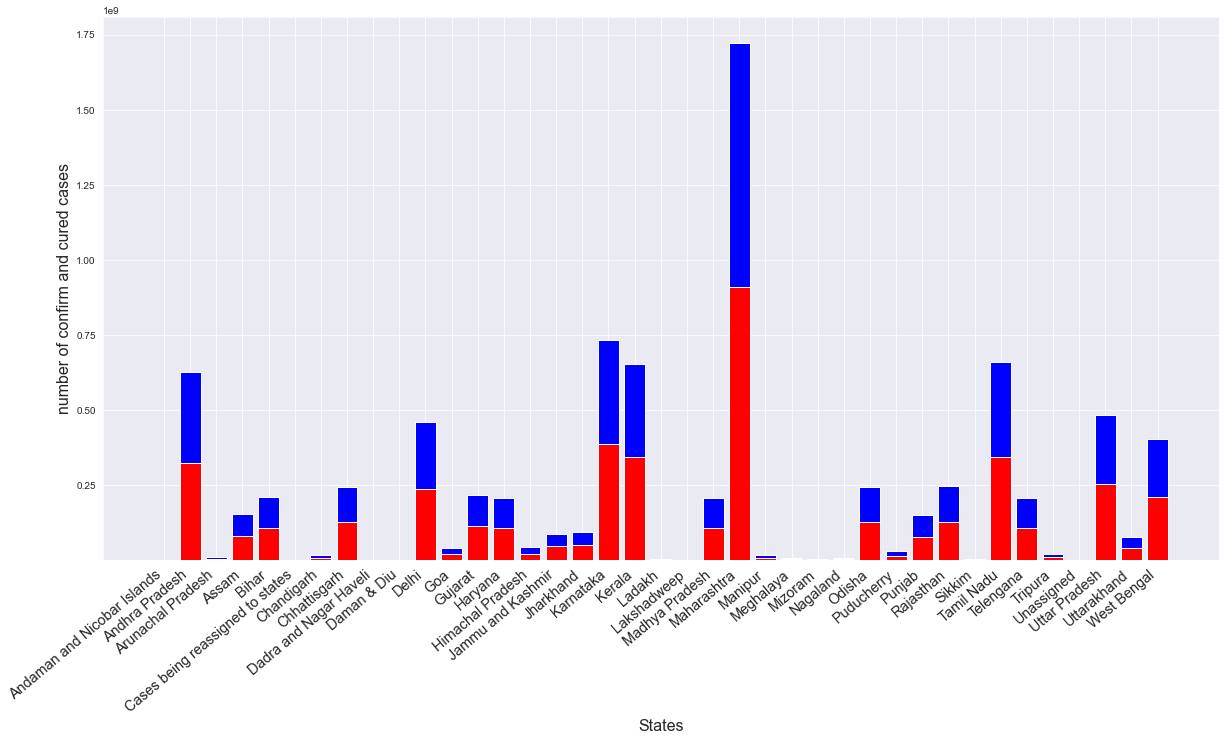

In [72]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="darkgrid")
plt.bar(x,y,color='r')
plt.bar(x,c,bottom=y,color='b')
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.xlabel('States',fontsize=16)
plt.ylabel('number of confirm and cured cases',fontsize=16)
plt.show()

Barplot showing deaths and confirm cases

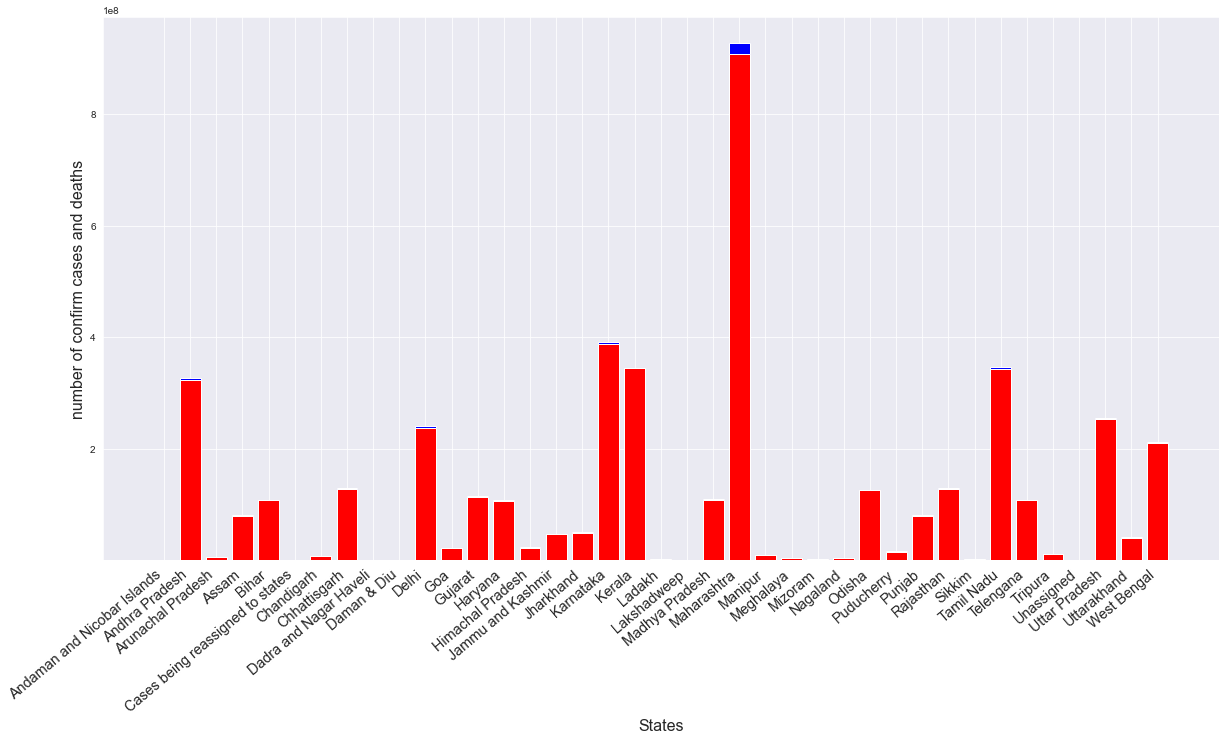

In [156]:
fig=plt.figure(figsize=(20,10))
sns.set_style(style="darkgrid")
plt.bar(x,y,color='r')
plt.bar(x,z,bottom=y,color='b')
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.xlabel('States',fontsize=16)
plt.ylabel('number of confirm cases and deaths',fontsize=16)
plt.show()

Chart showing confirm cases in each month

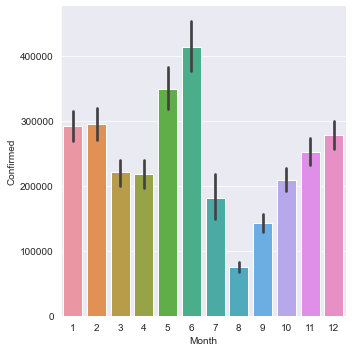

In [157]:
sns.catplot(data=covid,x='Month',y='Confirmed',kind='bar')

Chart showing Deaths in each month

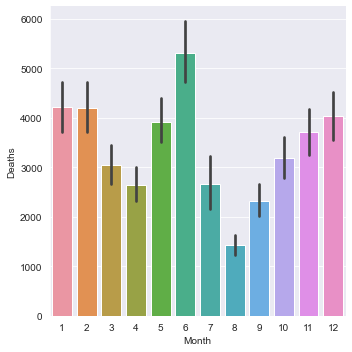

In [154]:
sns.catplot(data=covid,x='Month',y='Deaths',kind='bar')

Chart showing deaths in each Year

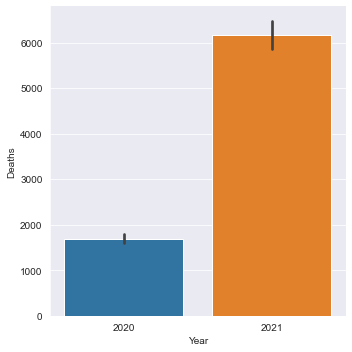

In [158]:
sns.catplot(data=covid,x='Year',y='Deaths',kind='bar')

Chart showing confirm cases in each year

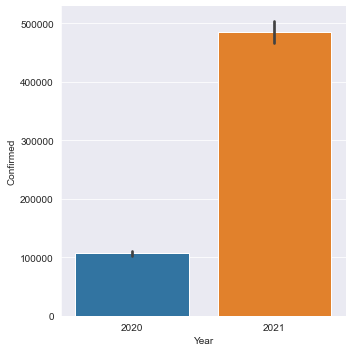

In [155]:
sns.catplot(data=covid,x='Year',y='Confirmed',kind='bar')

Chart showing confirm cases,deaths and cured in each month

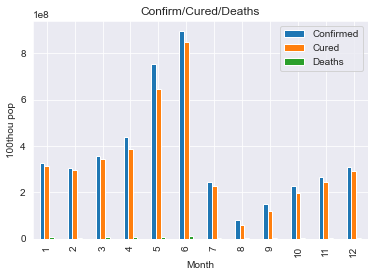

In [107]:
sns.set_style(style="darkgrid")
sum_mon.plot(kind="bar",title="Confirm/Cured/Deaths")
plt.ylabel("100thou pop")
plt.show()

Chart showing confirm cases, deaths and cured in each year

Text(0, 0.5, '100thou pop')

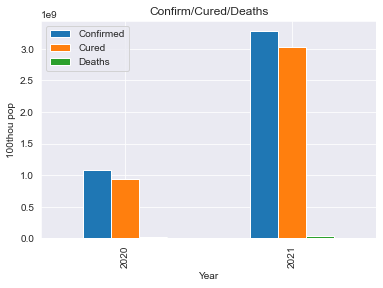

In [114]:
sum_year.plot(kind="bar",title="Confirm/Cured/Deaths")
plt.ylabel("100thou pop")

Text(0, 0.5, 'Y Axis')

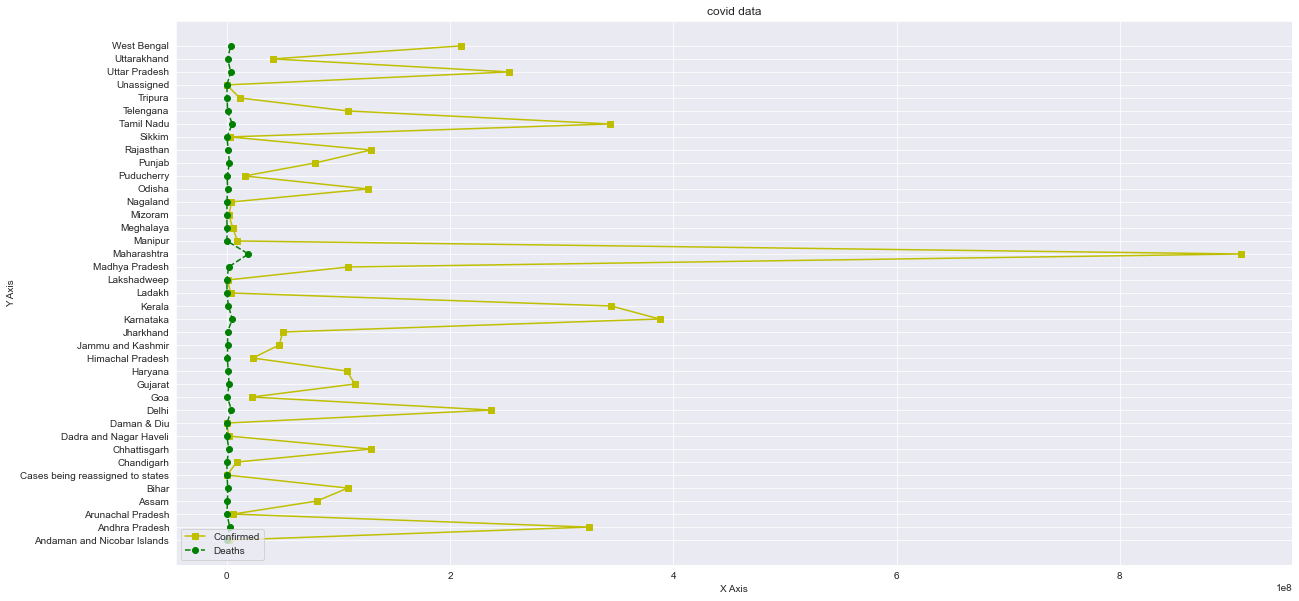

In [162]:
fig = plt.figure(figsize=(20,10))
plt.plot(y,x,'ys-')
plt.plot(z,x,'go--')
plt.legend(['Confirmed','Deaths'],loc='lower left')
plt.title('covid data')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

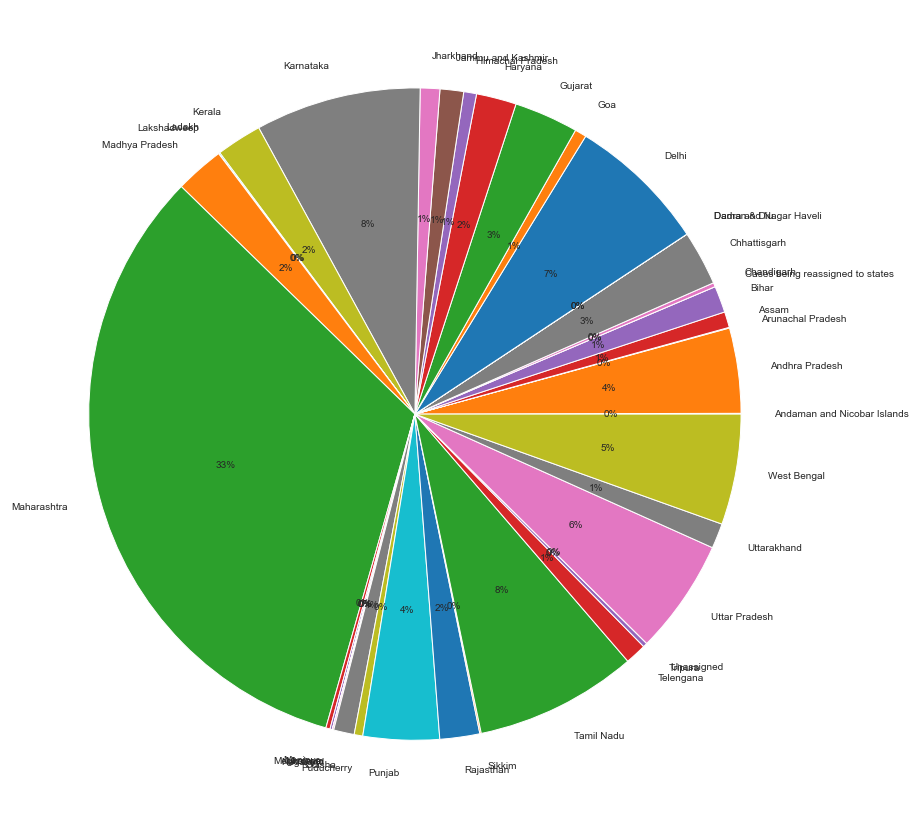

In [169]:
plt.figure(figsize=(30,15))
plt.pie(z,labels=x,autopct='%1.f%%')    #pie chart to show deaths in each state
plt.show()

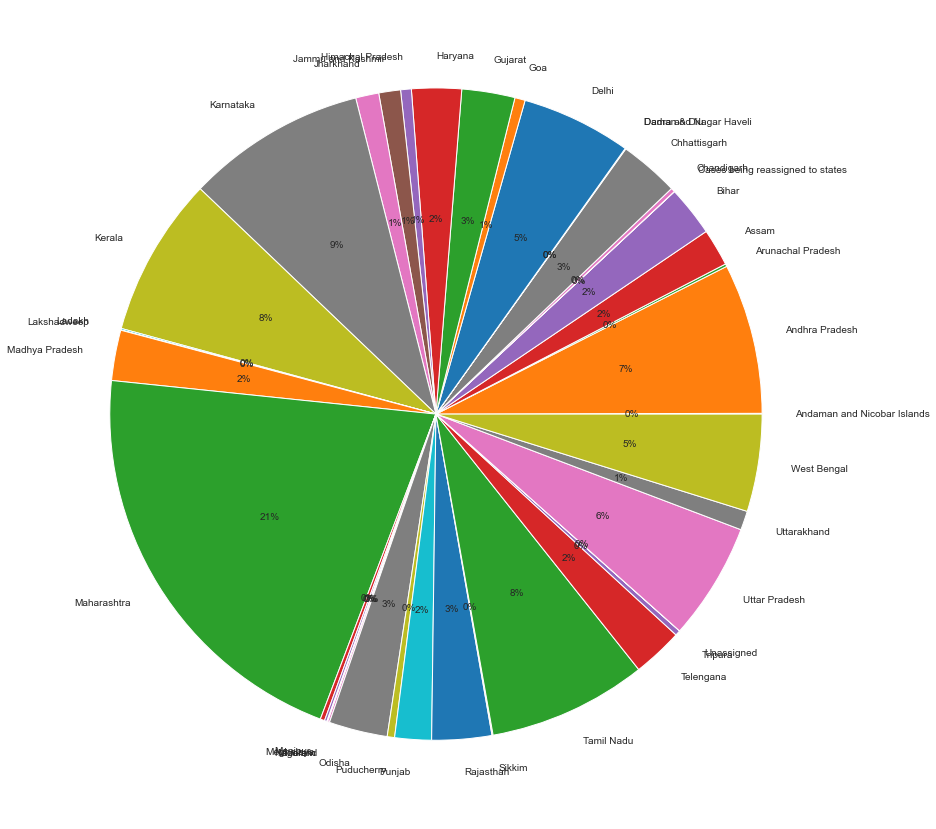

In [170]:
plt.figure(figsize=(30,15))
plt.pie(y,labels=x,autopct='%1.f%%')    #pie chart to show cases in each state
plt.show()